<a href="https://colab.research.google.com/github/yyoonyoon/201935291-/blob/main/7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공 신경망

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [45]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 패션 MNIST

In [46]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [47]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [48]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


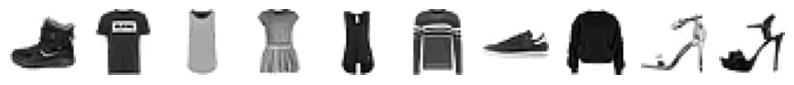

In [49]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [50]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [51]:
import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 로지스틱 회귀로 패션 아이템 분류하기

In [52]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)

(60000, 784)


In [53]:
# 정규화 함수 사용
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_input.reshape(-1, 28*28))
# print(scaler.data_max_)
# print(scaler.data_min_)
train_scaled1 = scaler.transform(train_input.reshape(-1, 28*28))
test_scaled1=scaler.transform(test_input.reshape(-1, 28*28))
print(train_scaled1.shape)

(60000, 784)


In [54]:
print(train_scaled.shape)

(60000, 784)


In [55]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8196000000000001


## 인공신경망

### 텐서플로와 케라스

GPU 사용가능한 특징이 있음!

In [56]:
import tensorflow as tf

In [57]:
from tensorflow import keras

## 인공신경망으로 모델 만들기

인공신경망에서는 교차검증을 잘 사용하지 않음. 시간 너무 많이 걸리고 데이터셋이 충분히 크기 때문에 굳이 필요없음.


In [58]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [59]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [60]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [61]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

소프트 맥스 함수가 들어가는 이유? => 다중분류이기 때문에

In [62]:
model = keras.Sequential(dense)

밀집층 생성. 뉴런이 양측을 모두 연결하므로 완전 연결층이라고도 불림.
784 * 10 = 7840

sequential 사용하는 이유? => dense 가 여러개 일 수 있기 때문에. 여긴 하나임.

## 인공신경망으로 패션 아이템 분류하기

In [63]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

sparse 가 붙은 이유는 클래스레이블이 정수이기 때문.

이진 분류의 양성 일때 1 음성일 때 0.

In [64]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [65]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6069 - accuracy: 0.7947
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4742 - accuracy: 0.8382
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4508 - accuracy: 0.8474
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4367 - accuracy: 0.8527
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4280 - accuracy: 0.8555


In [66]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.4526 - accuracy: 0.8465


[0.45262548327445984, 0.8464999794960022]

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4230 - accuracy: 0.8559 - val_loss: 0.4409 - val_accuracy: 0.8482
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4183 - accuracy: 0.8576 - val_loss: 0.4546 - val_accuracy: 0.8436
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4154 - accuracy: 0.8591 - val_loss: 0.4350 - val_accuracy: 0.8536
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4113 - accuracy: 0.8622 - val_loss: 0.4454 - val_accuracy: 0.8487
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4085 - accuracy: 0.8619 - val_loss: 0.4463 - val_accuracy: 0.8498


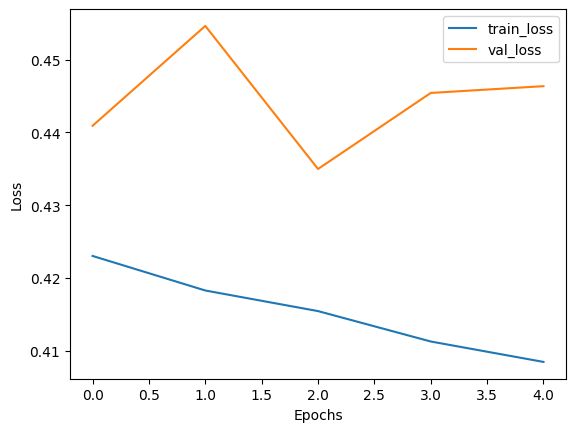

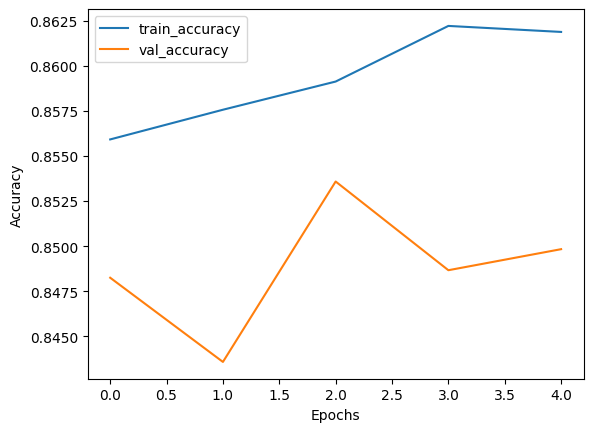

In [69]:
import matplotlib.pyplot as plt

history = model.fit(train_scaled, train_target, epochs=5, validation_data=(val_scaled, val_target))

# Loss 그래프 그리기
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy 그래프 그리기
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

입력층 출력층 뉴런 알아두기